# Retificador de meia onda (Carga R/C)

<center>
<img width="300" height="500" src="Figuras/06_meia_onda_rc.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

In [2]:
################# Definições 1 ##################
V_pk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

In [8]:
################# Definições 2 ##################
V_pk = 220*sqrt(2)
Freq = 60
R = 100

Vc1_max = V_pk

#Define Valor médio
V_med = 170
Vc1_min = V_med*2 - Vc1_max

##OU##

#Define Valor Vc1_min
#Vc1_min = 210
#V_med = (Vc1_max + Vc1_min)/2

P_r = V_med**2 / R

C = 2* (P_r/(Freq*(Vc1_max**2 - Vc1_min**2)))

print(C, "F")

0.00010038240946582444 F


# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 189.5544309405876 
Vrms: 	 202.2318598831595
# - Corrente na fase - # 
Ipk: 	 12.172250825623944 
Im: 	 1.8955443150845164 
Irms: 	 4.2448664658723025
# - Corrente no resistor - # 
Ipk: 	 3.1112544221335616 
Im: 	 1.8955443094058753 
Irms: 	 2.0223185988315953
# - Corrente no capacitor - # 
Ipk: 	 11.28375180412711 
Im: 	 5.619461469723962e-09 
Irms: 	 3.7321734669687663
# - Corrente de saída - # 
Ipk: 	 12.172250825623944 
Im: 	 1.8955443150845164 
Irms: 	 4.2448664658723025
# - Potências de uma fase - # 
Ppk:	 1833.7225116768066 
P: 	 250.7665689470053 
S: 	 933.8706224919066
# - Fatores - # 
FP:	 0.26852388640074026 
THD V:	 0.0018850159739448897 
THD I:	 1.3718722090568107


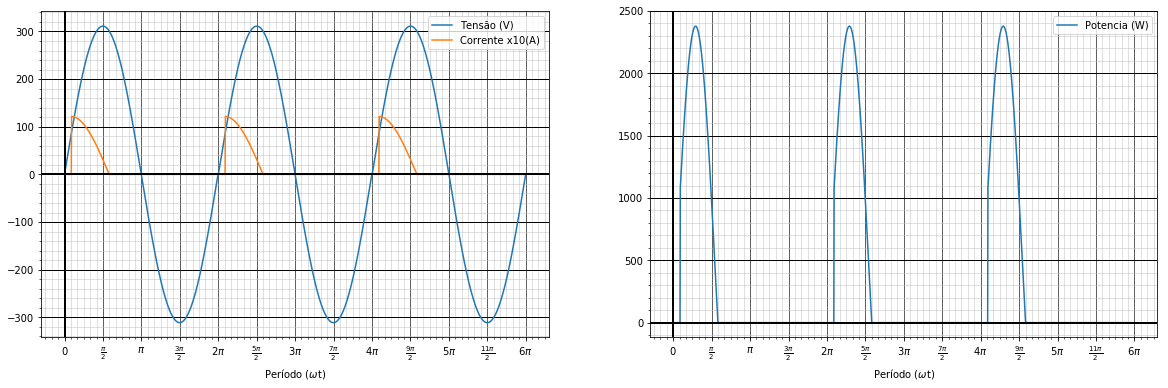

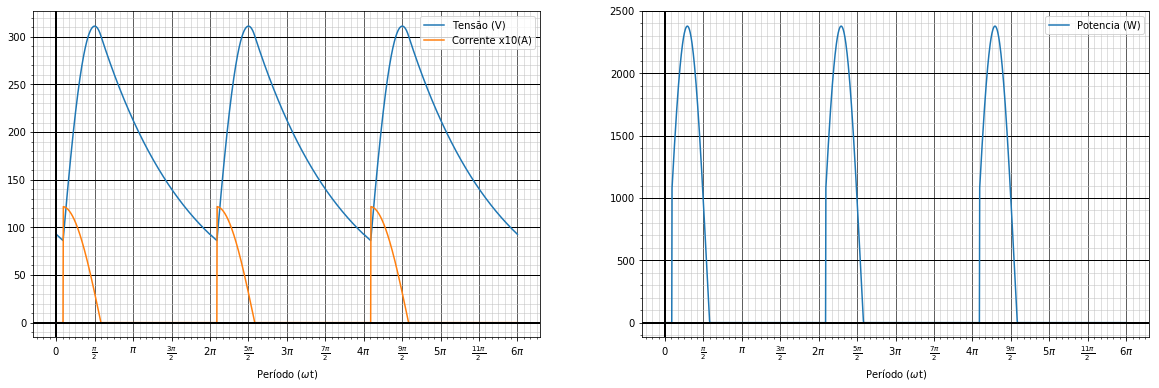

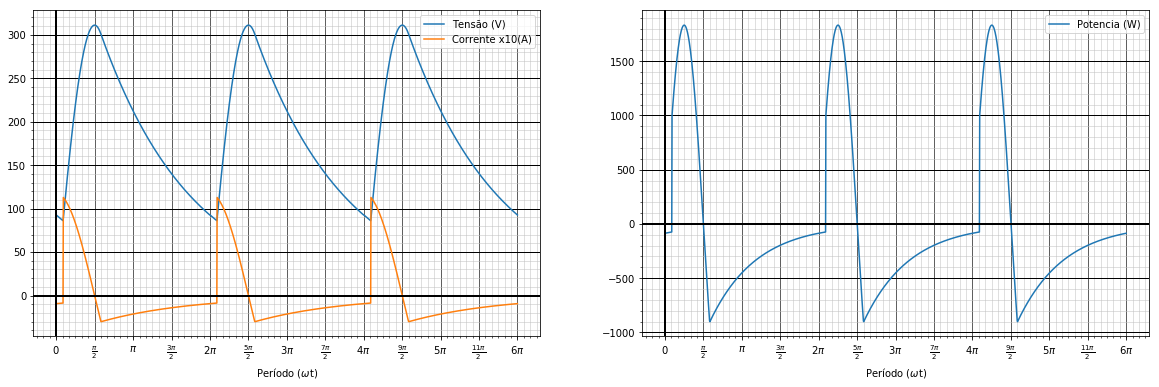

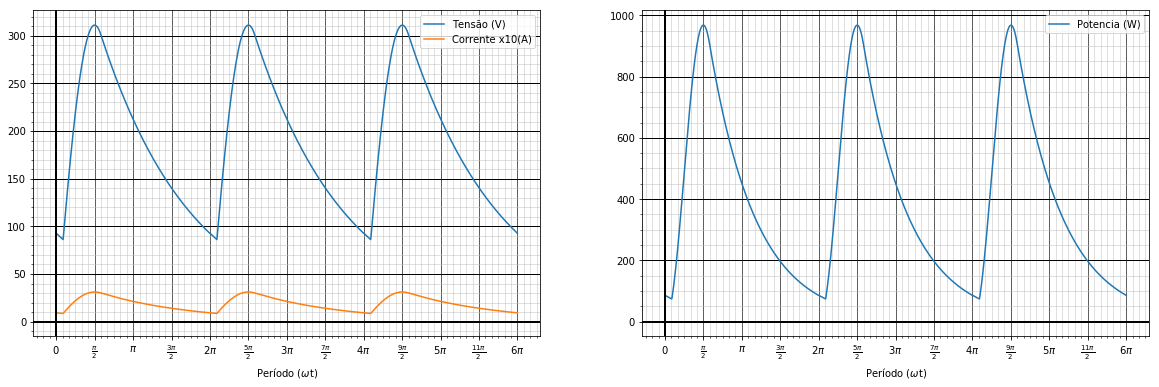

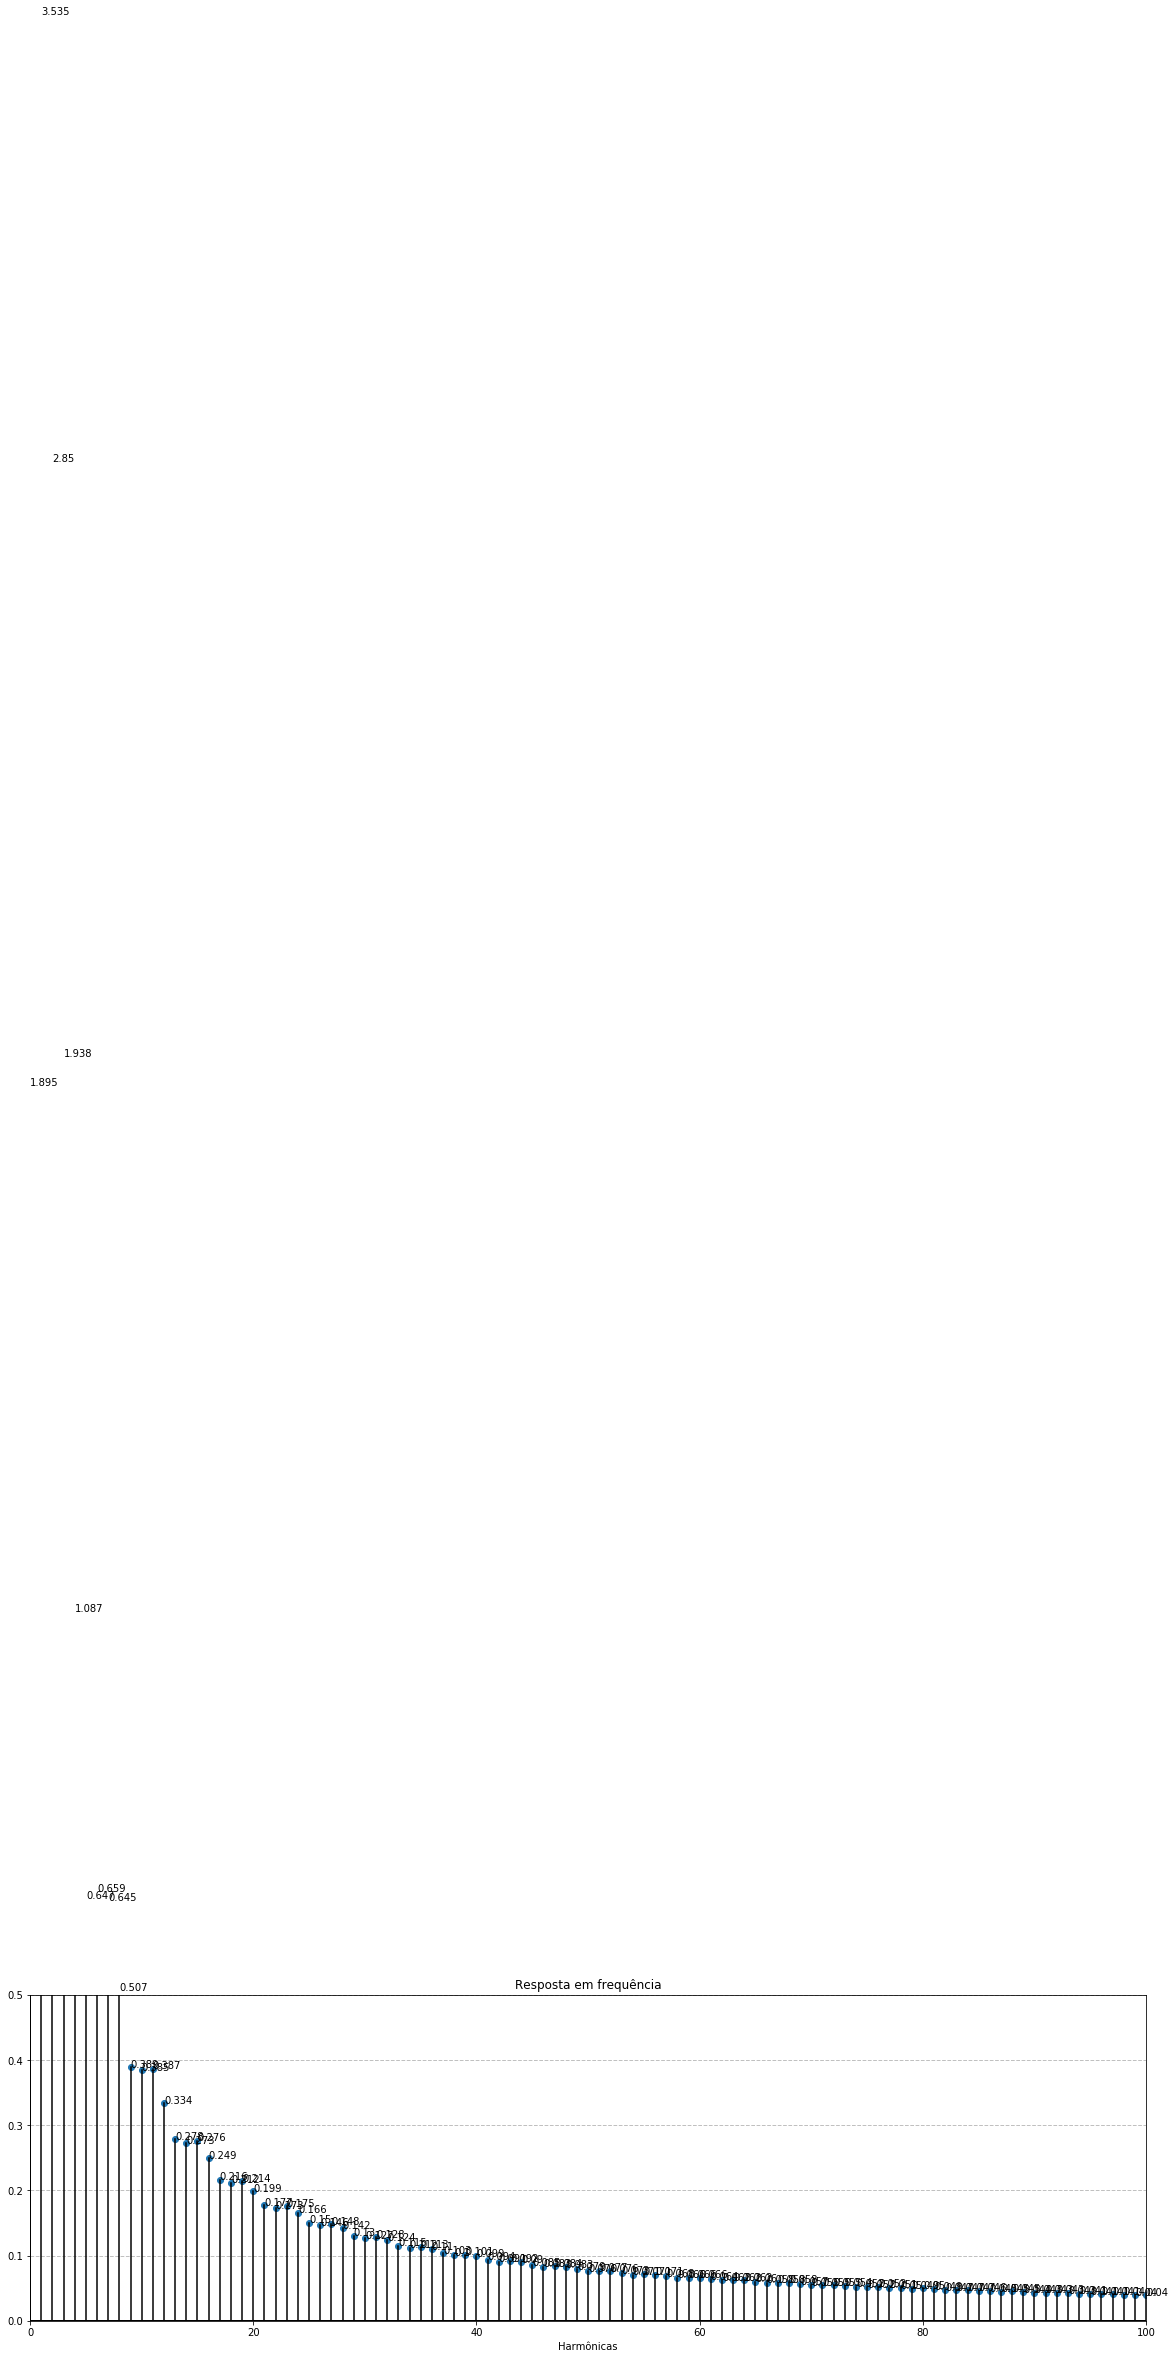

In [9]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA RC ####################

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

ab = calculo_ab(f'sin(x) - sin({teta})*exp(-(2*{pi}+x-{teta})/{w*R*C})', pi/2, 'numpy')
a = ab[0]


# Tensão de saída do retificador
func_vout = f'({rampa_RC(V_pk, teta, w*R*C, 2*pi)} *({degrau(0, a)}))'
# Parcela
func_vout = f'{func_vout} + ({V_pk}*sin(x)*{degrau(a,teta)})'
func_vout = f'{func_vout} + ({rampa_RC(V_pk, teta, w*R*C)} *({degrau(teta, 2*pi)}))'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente no resistor do retificador trifásico com ponto médio
func_ir = f'(({func_vout})/{R})'
Ir_media = calculo_medio(func_ir)
Ir_rms = calculo_rms(func_ir)
Ir_pk = calculo_pk(func_ir)

# Corrente no capacitor do retificador
func_ic = f'({w*C*V_pk}*cos(x)*{degrau(a,teta)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C,2*pi)}*{degrau(0,a)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C)}*{degrau(teta,2*pi)})'
Ic_media = calculo_medio(func_ic)
Ic_rms = calculo_rms(func_ic)
Ic_pk = calculo_pk(func_ic)

# Corrente de saída do retificador
func_iout = f'{func_ic} + {func_ir}'
# Calculos com base na forma de onda
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
Iout_pk = calculo_pk(func_iout)

# Tensão de entrada
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase do retificador trifásico com ponto médio
func_iin = func_iout
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)
Iin_pk = calculo_pk(func_iin)

# Potencia ativa e aparente da entrada do retificador
func_p = f'{func_vin} * {func_iin}'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"       , "\nVpk:\t" , V_pk   , "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na fase - #"      , "\nIpk: \t", Iin_pk , "\nIm: \t"  , Iin_media , "\nIrms: \t", Iin_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk  , "\nIm: \t"  , Ir_media  , "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk  , "\nIm: \t"  , Ic_media  , "\nIrms: \t", Ic_rms)
print("# - Corrente de saída - #"     , "\nIpk: \t", Iout_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências de uma fase - #" , "\nPpk:\t" , P_pk   , "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"               , "\nFP:\t"  , FP     , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vout, func_ic, xlim=(0, T))
plot_info(func_vout, func_ir, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_iin, ax2, T=2*np.pi, n_harmonicas = 100)